# House Sales in King County, USA

##### Author: Fridah Kimathi


<img src="images\King_county_houses.jpeg" alt="A picture of houses in King County, USA" width="600" height="400">

# **Business Understanding**
    
The project aims to aid a Real Estate Agency in King county, Washington-USA predict the house prices for single-family homes that their potential clients are looking buy and/or sell. The business problem the project aims to tackle is to highlight the main influential factors affecting a home's value in King county, Washington-USA. 

### **Importing the required libraries**

In [1]:
# importing pandas for data wrangling and manipulation
import pandas as pd

# importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')

# numpy for numerical operation and arrays
import numpy as np

# importing libraries needed for the linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### **Loading the data**

In [2]:
kc_df = pd.read_csv("data/kc_house_data.csv")

In [3]:
#Previewing the first 5 rows of the entire dataset
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# **Data Understanding**

The dataset used in the project highlights the house sales in King County, USA in the years 2014 and 2015. The relevant features in the dataset used for analysis and modeling in this project are; house id, date, house price, number of bedrooms and bathrooms, size of living space and property, number of floors the house has, the condition and grade of the house according to the King County System and the year the house was built.
The dataset has 21597 data entries.

In [4]:
# All the columns in the King County dataset
kc_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Dropping irrelevant columns 
irrelevant_columns = ['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 
kc_new_df = kc_df.drop(irrelevant_columns, axis=1)

In [6]:
#Previewing the first seven rows of kc_new_df 
kc_new_df.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995


In [7]:
# Checking for the shape, column names and data types 
kc_new_df.info()
    # The data has 21597 rows and 12 columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  float64
 9   condition    21597 non-null  int64  
 10  grade        21597 non-null  int64  
 11  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 2.0+ MB


In [8]:
# Statistical summary of the dataframe 
kc_new_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


 - Observations from the  Statistical summary of the dataframe:
  
    <ol type='i'> <li> Waterfront column's data is presented in binary format. From the research done, 1 represents homes with a waterfront view and 0 represents homes without waterfront view </li> 
    <li>Condition is arranged from 1 to 5. According to <a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r"> King County Property Info website </a> condition is relative to age and grade and is coded as follows; <ul>
     <li> 1 represents Poor- Worn out</li>
     <li> 2 represents Fair- Badly worn </li> 
     <li> 3 represents Average </li> 
     <li> 4 represents Good </li> 
     <li> 5 represents Very Good. </li> 
     </ul> 
      </li>
    <li>Grade ranges from 3 to 13 in the dataset. According to <a href="https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r"> King County Property Info website </a> Grade represents the construction quality of improvements. Grades run from grade 1 to 13 and are generally defined as; <ul>
     <li> 1-3: Falls short of minimum building standards. </li>
     <li> 4: Generally older, low quality construction. Does not meet code.</li> 
     <li> 5: Low construction costs and workmanship. Small, simple design. </li> 
     <li> 6: Lowest grade currently meeting building code. Low quality materials and simple designs. </li> 
     <li> 7: Average grade of construction and design. Commonly seen in plats and older sub-divisions. </li> 
     <li> 8: Just above average in construction and design. Usually better materials in both the exterior and interior finish work. </li> 
     <li> 9: Better architectural design with extra interior and exterior design and quality </li> 
     <li> 10: 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage. </li> 
     <li> 11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.</li> 
     <li> 12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
    </li>
    <li> 13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc </li>
    </ul>
      </li>
    <li> Houses in the dataset were built between 1900 and 2015.</li>
</ol>

# **Data Preparation**

 #### **1. Identifying and dealing with missing values**
 <ul type='square'><li>Created a function to print out column(s) with missing data in the dataframe. </li> <ul>

In [9]:
def column_missing_values(data):
    
    """A function to check for missing values"""

    missing_data = {column:data[column].isnull().sum() for column in data.columns  if data[column].isnull().sum()}
    return(missing_data)

In [10]:
column_missing_values(kc_new_df)

{'waterfront': 2376}

In [11]:
# Replacing null values in the waterfront column with 0
kc_new_df['waterfront'] = kc_new_df['waterfront'].replace(np.NaN, 0)

In [12]:
# Confirming the missing values in the waterfront column have been replaced and the data has no more missing values
column_missing_values(kc_new_df)

{}

 #### **2. Data Type Conversion**

In [13]:
# Checking column data types
kc_new_df.dtypes

    #Observations:
        # The waterfront, date and yr_built columns have the wrong data types

id               int64
date            object
price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront     float64
condition        int64
grade            int64
yr_built         int64
dtype: object

In [14]:
# The waterfront column should be int, either 1,0
# Changing the data type for waterfront column from float to int
kc_new_df['waterfront'] = kc_new_df['waterfront'].astype('int64')

In [15]:
# Converting the date column from object datatype to datetime64[ns]
kc_new_df['date'] = pd.to_datetime(kc_new_df['date'])

In [16]:
# Converting the datatype of the 'yr_built' column from int64 to int32
# This will allow the correct output to be displayed when the datatype is converted to datetime64[ns]

kc_new_df['yr_built'].astype('int32')

# Converting the datatype from int32 to datetime64[ns]

kc_new_df['yr_built'] = pd.to_datetime(kc_new_df['yr_built'], format = '%Y')


 ##### **Creating a new column 'Age_house_when_sold'**
<ul type='square'><li>The column will be the difference between the date column and the yr_built column </li> <ul>

In [17]:
kc_new_df['Age_house_years_when_sold'] = round(((kc_new_df['date']- kc_new_df['yr_built'])/np.timedelta64(1, 'Y')),0)
kc_new_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Age_house_years_when_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955-01-01,60.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951-01-01,64.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,1933-01-01,82.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965-01-01,50.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987-01-01,28.0


In [18]:
# Converting the age_house_years_when_sold to int
kc_new_df['Age_house_years_when_sold'] = kc_new_df['Age_house_years_when_sold'].map(int)
kc_new_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Age_house_years_when_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955-01-01,60
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951-01-01,64
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,1933-01-01,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965-01-01,50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987-01-01,28


In [19]:
# Confirming that all data types have been changed.
kc_new_df.dtypes

id                                    int64
date                         datetime64[ns]
price                               float64
bedrooms                              int64
bathrooms                           float64
sqft_living                           int64
sqft_lot                              int64
floors                              float64
waterfront                            int64
condition                             int64
grade                                 int64
yr_built                     datetime64[ns]
Age_house_years_when_sold             int64
dtype: object

 #### **3. Identifying and dealing with duplicates**
<ul type='square'><li>Checking for duplicates using the column 'id' </li> <ul>

In [20]:
# Checking for duplicates using the column 'id' since we don't want houses to appear more than once
kc_new_df[kc_new_df['id'].duplicated(keep=False)]

# The data has duplicates. This is because a house might have been sold more than once in the years 2014 and 2015

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Age_house_years_when_sold
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,3,8,1939-01-01,76
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,3,8,1939-01-01,76
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0,3,11,1997-01-01,17
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,11,1997-01-01,18
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,3,6,1922-01-01,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,3,8,2013-01-01,2
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,3,7,1933-01-01,81
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,3,7,1933-01-01,82
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,3,9,2013-01-01,2


 - Dropping the above duplicates while keeping the entry with the latest date was achieved by:
  
    <ol type='i'> <li> Sorting the data frame using the date column</li> 
    <li>Dropped duplicates using the 'id' column and kept the last entry which had the latest date.</li>
</ol>

In [21]:
kc_new_df = kc_new_df.sort_values(by='date').drop_duplicates(subset='id', keep='last')
kc_new_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Age_house_years_when_sold
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0,4,7,1954-01-01,60
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,3,8,2012-01-01,2
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,4,7,1976-01-01,38
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,3,7,2009-01-01,5
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,4,9,1951-01-01,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,0,4,8,1960-01-01,55
12623,4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,0,4,7,1985-01-01,30
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,3,7,1960-01-01,55
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,3,6,1941-01-01,74


In [22]:
# Confirming the duplicate have been dropped
kc_new_df['id'].duplicated(keep=False).sum()

0

 #### **3. Identifying and dealing with outliers**
<ul type='square'><li>Checking for outliers using the columns 'bedrooms' and 'bathrooms' since we want single-family homes</li> <ul>

In [23]:
print(f' Number of bedrooms in the dataset: {kc_new_df["bedrooms"].value_counts()}\
         \n*******************************\nNumber of bathrooms in the dataset:{kc_new_df["bathrooms"].value_counts()}')

    #Observations:
        # There are buildings in the dataset that are not single-family homes 
        # Some buildings have 33 and 11  bedrooms which is not expected in a single-family homes
        # It is also not expected that an average single-family home has 8 bathrooms

 Number of bedrooms in the dataset: 3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64         
*******************************
Number of bathrooms in the dataset:2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


In [24]:
# Function for identifying and removing outliers in a dataset

def outliers(column):
    """ 
    Function for identifying and removing outliers in a dataset. The function uses z score for the identification of outliers.
    """
    mean = column.mean()
    std = column.std()
    kc_new_df['z_score']= (column - mean)/std
    for idx, zscore in kc_new_df['z_score'].iteritems():
        if (abs(zscore) > 3):
             kc_new_df.drop(idx, inplace=True)
    kc_new_df.drop('z_score', axis=1, inplace=True)

In [25]:
outliers(kc_new_df['bedrooms'])

In [26]:
outliers(kc_new_df['bathrooms'])

In [27]:
# Confirming that the outliers have been removed
print(f' Number of bedrooms in the dataset: {kc_new_df["bedrooms"].value_counts()}\
         \n*******************************\nNumber of bathrooms in the dataset:{kc_new_df["bathrooms"].value_counts()}')


 Number of bedrooms in the dataset: 3    9726
4    6792
2    2736
5    1515
6     227
1     191
Name: bedrooms, dtype: int64         
*******************************
Number of bathrooms in the dataset:2.50    5349
1.00    3793
1.75    3019
2.25    2028
2.00    1912
1.50    1427
2.75    1176
3.00     738
3.50     723
3.25     584
3.75     152
4.00     126
4.25      77
0.75      70
1.25       9
0.50       4
Name: bathrooms, dtype: int64


 #### **4. Checking for and removing multicolinearity**

In [28]:
# Dropping columns that are no longer need in the data frame
new_irrelevant_columns = ['id', 'date', 'yr_built']
kc_new_df = kc_new_df.drop(new_irrelevant_columns, axis=1)

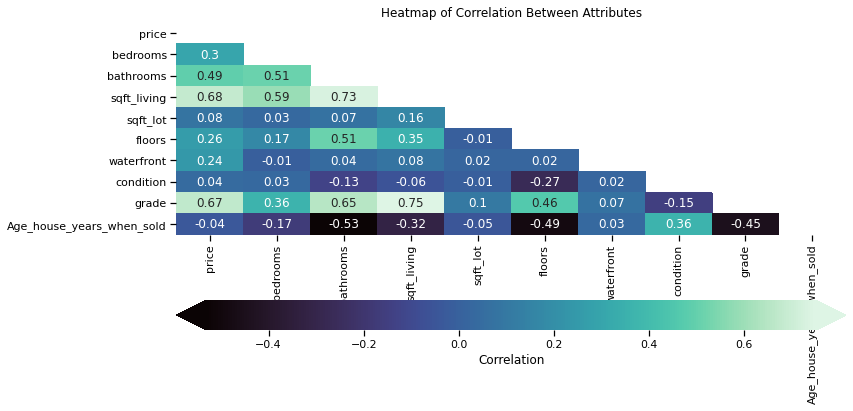

In [29]:
# df with the correlation matrix
kc_data_corr = round(kc_new_df.corr(), 2)

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(12,6))

# Plotting a heatmap of the correlation matrix(kc_data_corr), with both numbers and colors indicating the correlations
sns.heatmap(
    # Specifying the data to be plotted
    data = kc_data_corr,

    # The mask is used to ensure duplicates are not shown
    mask=np.triu(np.ones_like(kc_data_corr, dtype=bool)),

    # Specifying the that the existing axes (ax) should be used
    ax=ax,
     # Specifying that the labels should be shown too.
    annot=True,
     
     # Customizing the  colorbar appearance
    cmap="mako",
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
    
)
# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

**_Observations_**:
 <ul type='square'> 
   <li> (sqft_living and price) and (grade and price) have a relatively high correlation of around 0.7</li>
    <li>(bathrooms and sqft_living), (grade and bathrooms) and (grade and sqft_living) and  are highly correlated. </li>
    <li> The correlation of the above features is below 8 and is not strong enough to warranty the removal of one of the columns. In other words, the correlation between the features is not high enough to cause a high multicolinearity that could negatively affect the model </li>
 </ul>

 #### **5. Splitting the data into train and test data**

In [30]:
# Defining the independent variables ,X, and the dependent variable ,y
X = kc_new_df.drop('price', axis=1)
y = kc_new_df[['price']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 #### **6. Normalizing the numeric data**

In [32]:
# The independent continuous numerical columns are;
X_cont_columns = ['sqft_living', 'sqft_lot']

In [33]:
print(f'Sqft_living skewness: {X_train[X_cont_columns[0]].skew()}')
print(f'Sqft_lot skewness: {X_train[X_cont_columns[1]].skew()}')
print(f'Price skewness: {y_train.skew()}')

Sqft_living skewness: 1.0356690929276982
Sqft_lot skewness: 13.200962621848188
Price skewness: price    2.880731
dtype: float64


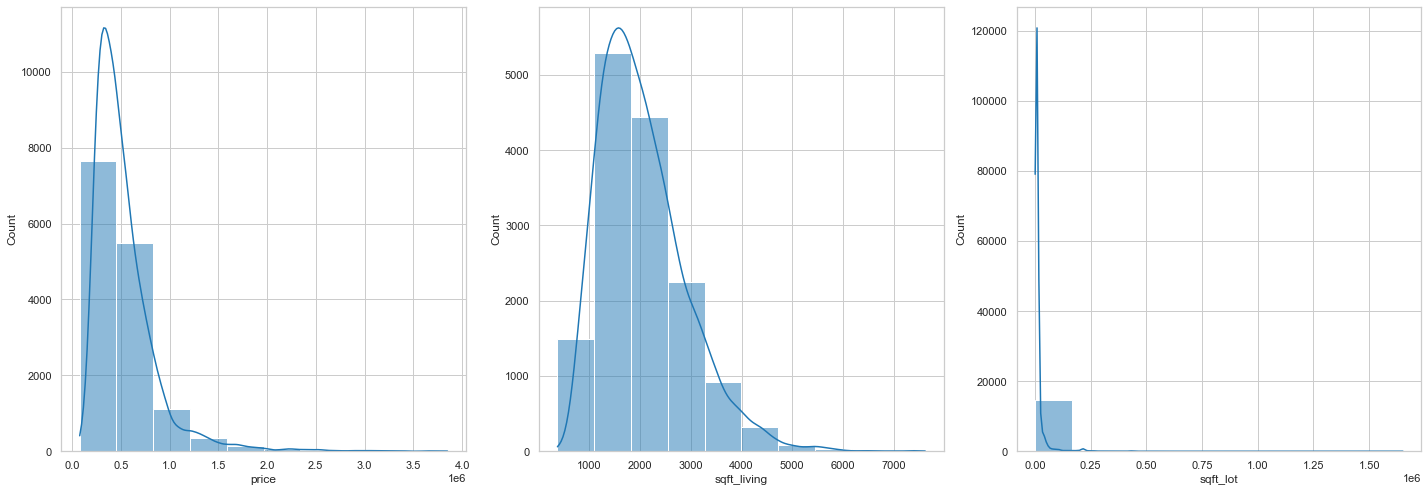

In [34]:
# Histogram showing the distribution of the continuous columns
sns.set_style('whitegrid')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,7))
sns.histplot(y_train['price'],bins=10, kde=True,ax=ax1);
sns.histplot(X_train[X_cont_columns[0]],bins=10,kde=True,ax=ax2)
sns.histplot(X_train[X_cont_columns[1]],bins=10, kde=True,ax=ax3);
fig.set_tight_layout(True)

    #Observation:
        # Price and sqft_lot are are more skewed than sqft_living

 ##### **Log transformation on continuous features to reduce skewness and data variablility** 
 > > >   ##### **1. X_train log transformation**

In [35]:
# Log transformation on continuous features to reduce skewness and data variablility

# Instantiate a custom transformer for log transformation 
log_transformer = FunctionTransformer(np.log, validate=True)
new_log_columns = ['sqft_living_log', 'sqft_lot_log']

# Log transform the training columns and convert them into a DataFrame 
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[X_cont_columns]), 
                           columns=new_log_columns, index=X_train.index) 

# Replacing training columns with transformed versions
X_train = pd.concat([X_train.drop(X_cont_columns, axis=1), X_train_log], axis=1)
X_train.head(2)

,bedrooms,bathrooms,floors,waterfront,condition,grade,Age_house_years_when_sold,sqft_living_log,sqft_lot_log
8269,3,1.0,1.5,0,4,7,104,7.098376,8.656955
9371,3,3.0,3.0,0,3,8,11,7.154615,6.989335


 > > >   ##### **2. X_test log transformation**

In [36]:
# Log transform the test columns and convert them into a DataFrame 
X_test_log = pd.DataFrame(log_transformer.transform(X_test[X_cont_columns]), 
                          columns=new_log_columns, index=X_test.index)

# Replace testing columns with transformed versions
X_test = pd.concat([X_test.drop(X_cont_columns, axis=1), X_test_log], axis=1)
X_test.head(2)

,bedrooms,bathrooms,floors,waterfront,condition,grade,Age_house_years_when_sold,sqft_living_log,sqft_lot_log
13475,4,2.5,2.0,0,3,8,21,7.450080,9.063926
8430,3,2.0,1.0,0,3,8,34,7.402452,9.632859


 > > >   ##### **3. y_train log transformation**

In [37]:
# Log transform the test columns and convert them into a DataFrame 
y_cont_column = ['price']
new_price_column = ['price_log']
#Log transform the training columns and convert them into a DataFrame 
y_train_log = pd.DataFrame(log_transformer.fit_transform(y_train[y_cont_column]), 
                           columns=new_price_column, index=y_train.index) 

# Replacing training columns with transformed versions
y_train = pd.concat([y_train.drop(y_cont_column, axis=1), y_train_log], axis=1)
y_train.head(2)

,price_log
8269,12.994530
9371,13.186277


 > > >   ##### **4. y_test log transformation**

In [38]:
# Log transform the training columns and convert them into a DataFrame 
y_test_log = pd.DataFrame(log_transformer.fit_transform(y_test[y_cont_column]), 
                          columns=new_price_column, index=y_test.index) 

# Replacing training columns with transformed versions
y_test = pd.concat([y_test.drop(y_cont_column, axis=1), y_test_log], axis=1)
y_test.head(2)

,price_log
13475,12.206073
8430,13.171154


In [39]:
# Showing the skewness of the normalized continuous columns
print(f'Sqft_living skewness: {X_train[new_log_columns[0]].skew()}')
print(f'Sqft_lot skewness: {X_train[new_log_columns[1]].skew()}')
print(f'Price skewness: {y_train[new_price_column].skew()}')

 # Observations:
    #The skewness has reduced significantly after transformation

Sqft_living skewness: -0.1126713243459846
Sqft_lot skewness: 0.9684231601552898
Price skewness: price_log    0.371371
dtype: float64


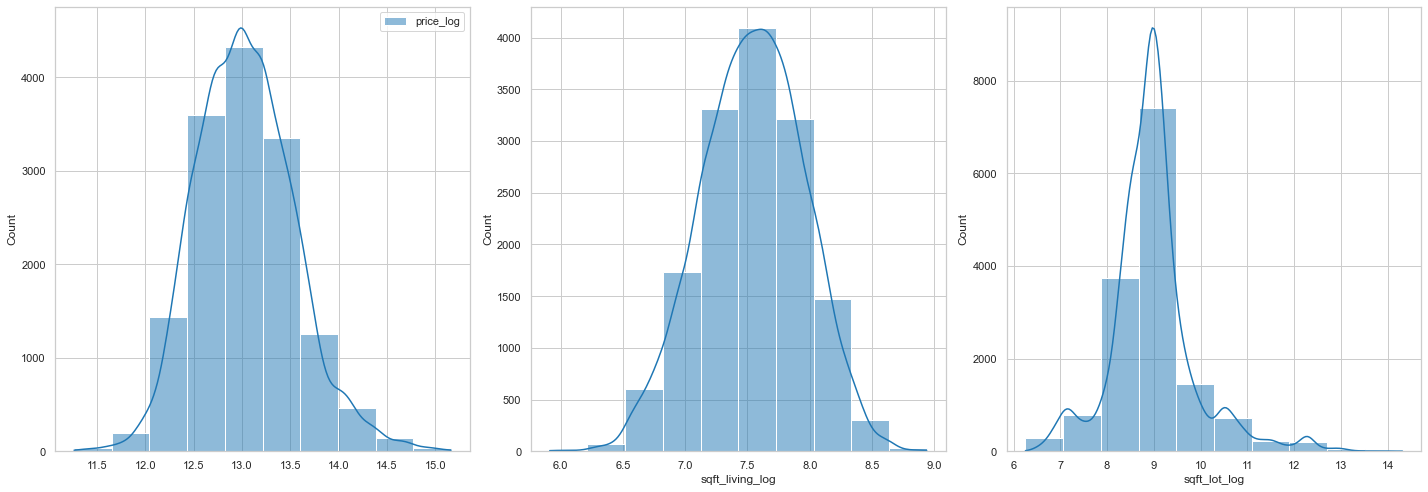

In [40]:
# Histogram showing the distribution of the normalized continuous columns
sns.set_style('whitegrid')
sns.set_context('notebook')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,figsize=(20,7))
sns.histplot(y_train[new_price_column],bins=10, kde=True,ax=ax1);
sns.histplot(X_train[new_log_columns[0]],bins=10,kde=True,ax=ax2)
sns.histplot(X_train[new_log_columns[1]],bins=10, kde=True,ax=ax3);
fig.set_tight_layout(True)

# **Modelling**

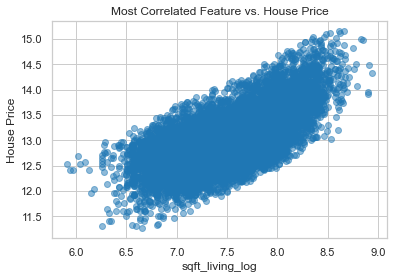

In [41]:
# Scatter plot of the most correlated features
most_correlated_feature = "sqft_living_log"

fig, ax = plt.subplots()
ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("House Price")
ax.set_title("Most Correlated Feature vs. House Price");

In [42]:
#Instantiate Linear regression model
baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train r-squared score:", baseline_scores["train_score"].mean())
print("Test r-squared score:", baseline_scores["test_score"].mean())

Train r-squared score: 0.43140415007318084
Test r-squared score: 0.43856826723306835


**_Observations_**:
 <ul type='square'> 
    <li>The model seems fairly weak, this is because r_squared takes a value between 0 and 1 where values closer to 0 represent a poor fit and values closer to 1 represent a perfect fit.</li>
    <li>The test subset performs slightly better than the training subset. </li>
    <li> There is a nearly identical performance in the training and test subsets, both indicating a variance of around 43%. </li>
 </ul>

 ##### **2. Second model with all features**

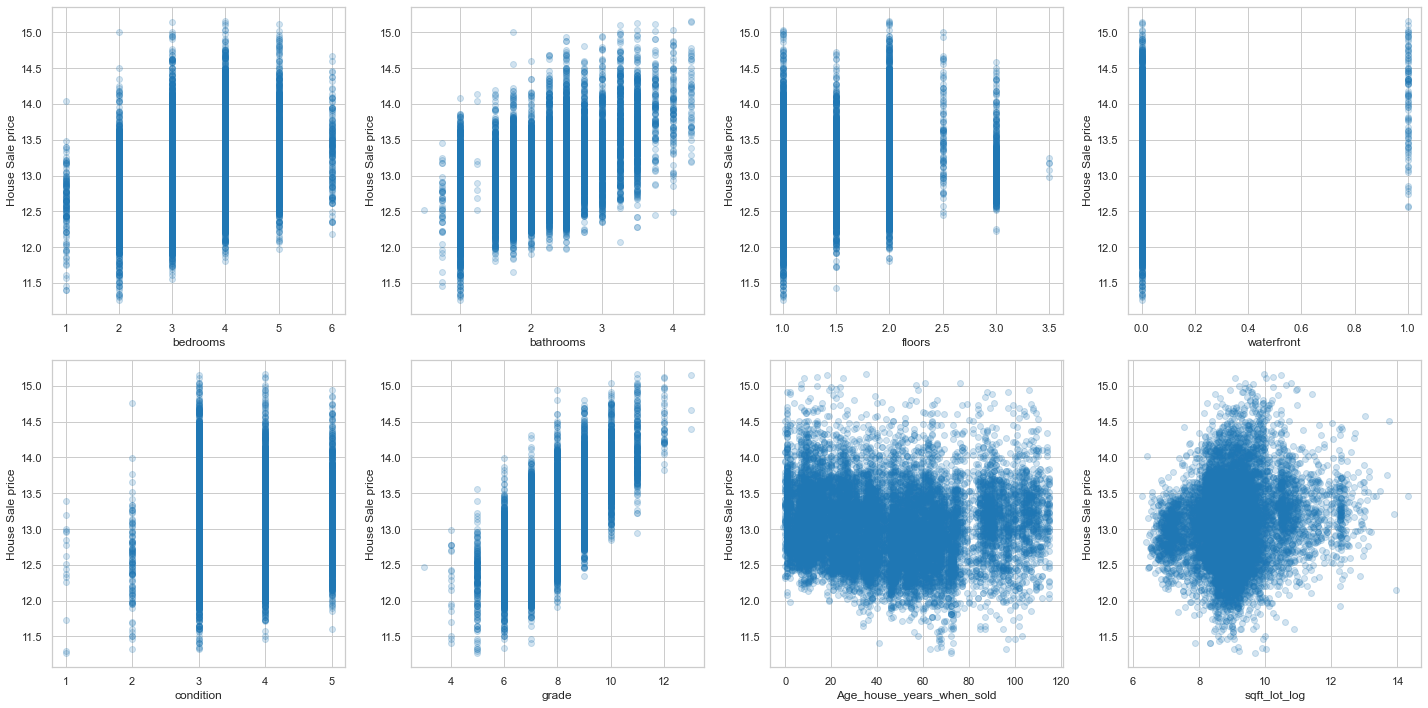

In [43]:
# Scatter plot of price against all the remaining features
second_model_features = X_train.drop('sqft_living_log', axis=1)

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
fig.set_tight_layout(True)

for index, col in enumerate(second_model_features.columns):
    ax = axes[index//4][index%4]
    ax.scatter(second_model_features[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("House Sale price")

In [44]:
# The second model

#Instantiate Linear regression model
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Second Model")
print("Train r-squared score:", second_model_scores["train_score"].mean())
print("Test r-squared score: ", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train r-squared score:", baseline_scores["train_score"].mean())
print("Test r-squared score: ", baseline_scores["test_score"].mean())

Second Model
Train r-squared score: 0.6307218034207568
Test r-squared score:  0.6342947302295064

Baseline Model
Train r-squared score: 0.43140415007318084
Test r-squared score:  0.43856826723306835


**_Observations_**:
 <ul type='square'> 
    <li>The second model performs better than the baseline model in both the training and test subset.</li>
    <li>The test subset of the second model performs better than the training subset.</li>
    <li> The difference in the r_squared value of the training and test subset small meaning the model will perform well with unknown data. </li>
 </ul>

 ##### **Looking for features that are statistically significant**
 

In [45]:
X_constant = sm.add_constant(X_train)
model = sm.OLS(y_train,X_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     2827.
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        04:25:47   Log-Likelihood:                -3681.2
No. Observations:               14830   AIC:                             7382.
Df Residuals:                   14820   BIC:                             7459.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         7.8293      0.072    109.235      0.000       7.689       7.970
bedrooms                     -0.0462      0.004    -11.741      0.000      -0.054      -0.039
bathrooms                     0.0865      0.006     13.736      0.000       0.074       0.099
floors                        0.0388      0.006      6.128      0.000       0.026       0.051
waterfront                    0.5720      0.032     17.850      0.000       0.509       0.635
condition                     0.0332      0.004      7.765      0.000       0.025       0.042
grade                         0.2353      0.004     65.235      0.000       0.228       0.242
Age_house_years_when_sold     0.0061      0.000     53.208      0.000       0.006       0.006
sqft_living_log               0.4437      0.013     33.967      0.000       0.418       0.469
sqft_lot_log                 -0.0446      0.003    -13.536      0.000      -0.051      -0.038
==============================================================================
Omnibus:                       50.723   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.816
Skew:                          -0.026   Prob(JB):                     3.10e-15
Kurtosis:                       3.325   Cond. No.                     1.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**_Observations_**:
 <ul type='square'>
   
   <li>All the features are noted to have a statistically significant p_value. This means that all the features are required to make the best model</li>
   <li> We can therefore reject the null hypothesis that states that <i>there is no relationship between the chosen explanatory variables and the response variable</i> </li>
 </ul>

In [46]:
#Instantiate Linear regression model
# Selecting the 4 best features for the model
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=4)
selector = selector.fit(X_train, y_train)
selector.support_

array([False, False, False,  True,  True,  True, False,  True, False])

In [47]:
# X_train columns 
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'Age_house_years_when_sold', 'sqft_living_log', 'sqft_lot_log'],
      dtype='object')

In [48]:
third_model = LinearRegression()
X_train_third_model = X_train[['bedrooms','waterfront', 'condition', 'sqft_living_log']]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Third Model")
print("Train r-squared score:", third_model_scores["train_score"].mean())
print("Test r-squared score: ", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train r-squared score:", second_model_scores["train_score"].mean())
print("Test r-squared score: ", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train r-squared score:", baseline_scores["train_score"].mean())
print("Test r-squared score: ", baseline_scores["test_score"].mean())

Third Model
Train r-squared score: 0.46134876228883187
Test r-squared score:  0.46879229074437995

Second Model
Train r-squared score: 0.6307218034207568
Test r-squared score:  0.6342947302295064

Baseline Model
Train r-squared score: 0.43140415007318084
Test r-squared score:  0.43856826723306835


**_Observations_**:
 <ul type='square'>
   
   <li> The third model confirms the earlier observation that all the features are required to make the final and best model because the p_values for all the features are statistically significant.</li>
   <li>The third model performs worse than the second model</li>
   <li> The second model is therefore taken to be the best and final model</li>
 </ul>

In [49]:
# Final model
# Instantiate Linear regression model 
final_model = LinearRegression()

# Fit the model on X_train and y_train
final_model.fit(X_train, y_train)

# Score the model on X_test and y_test)
final_model.score(X_test, y_test)

0.6303083495330205

In [50]:
# The mean squared errors
print(f'Train model Root Mean Squared Error: {mean_squared_error(y_train, final_model.predict(X_train), squared=False)}')
print(f'Test model Root Mean Squared Error: {mean_squared_error(y_test, final_model.predict(X_test), squared=False)}')

Train model Root Mean Squared Error: 0.31014688257869666
Test model Root Mean Squared Error: 0.3115416212623996


**_Observations on final model_**:
 <ul type='square'>
   <li> The RMSE of the test subset is better than the RMSE of the training subset.</li>
   <li>The r-squared value, 0.63, indicates that the model can account for about 63% of the variability of price around its mean. The null hypothesis for multiple regression is that there is no relationship between the chosen explanatory variables and the response variable. All of the p-values round to 0, which means we can reject the null hypothesis. </li>
 </ul>

 ##### **Assumptions of Linear model**

 * ##### **Investigating Linearity**

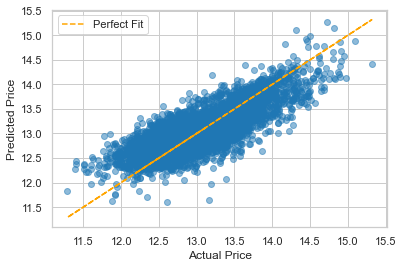

In [51]:
preds = final_model.predict(X_test)
fig, ax = plt.subplots()
ax.plot(y_test, y_test, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

There are a few outliers but generally the linearity assumption is not being violated.

 * ##### **Investigating Normality**

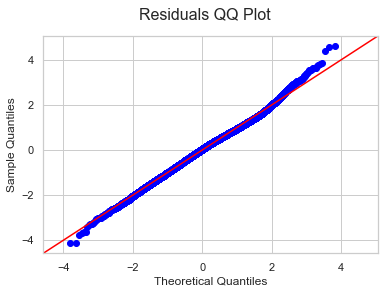

In [52]:
residual = model.resid
fig = sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16);

The normality assumption has not been violated.

 * ##### **Investigating Multicollinearity (Independence Assumption)**

In [53]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.Series(vif[1:], index=X_train.columns, name="Variance Inflation Factor").T

bedrooms                     1.797061
bathrooms                    3.182317
floors                       1.781764
waterfront                   1.017493
condition                    1.183489
grade                        2.615411
Age_house_years_when_sold    1.746372
sqft_living_log              4.519237
sqft_lot_log                 1.365693
Name: Variance Inflation Factor, dtype: float64

A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).
The VIF of all the features above is below 5 hence the multicollinearity is not high.

 * ##### **Investigating Homoscedasticity**

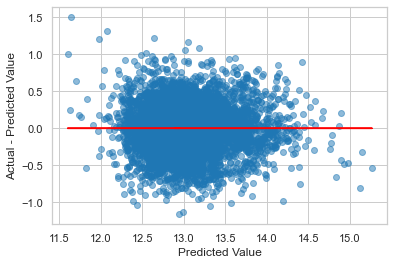

In [54]:
residuals = (y_test - preds)
fig, ax = plt.subplots()
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))], color='red')
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

The points have a roughly symmetrical blob-like shape that is consistent across the x-axis. Hence, the final assumption homoscedasticity is not being violated.

# **Conclusion**

<p>     Square footage, bedroom, bathrooms, floors, waterfront	condition, grade, Age_house_years_when_sold function has the best predictors of a home's price in King County, USA.The MSEs for the train and test subsets are almost similar, which suggests that the model will perform similarly on different data</p>
<p>     The model however does have some limitations. For instance, price and square footage(sqft_living and sqft_lot) needed to be log-transformed to satisfy the linear regression assumptions. Any new data used with the model would therefore also have to undergo a similar data preparation.</p>